In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import spectral_analysis as sa
from math import floor
import importlib
import sys
module = sys.modules["spectral_analysis"]
importlib.reload(module)

<module 'spectral_analysis' from 'd:\\Users\\rewas\\AppData\\Local\\Programs\\Python\\Python310\\lib\\site-packages\\spectral_analysis.py'>

# Shears

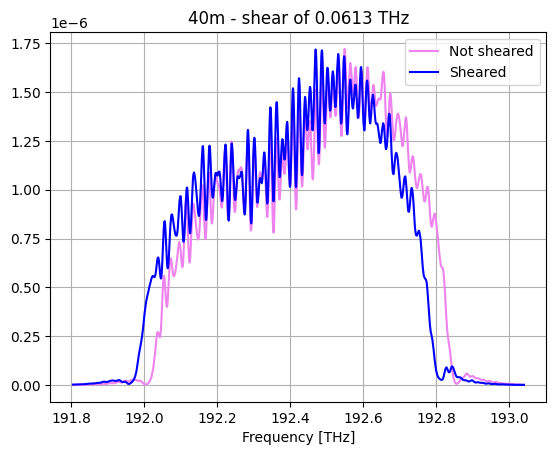

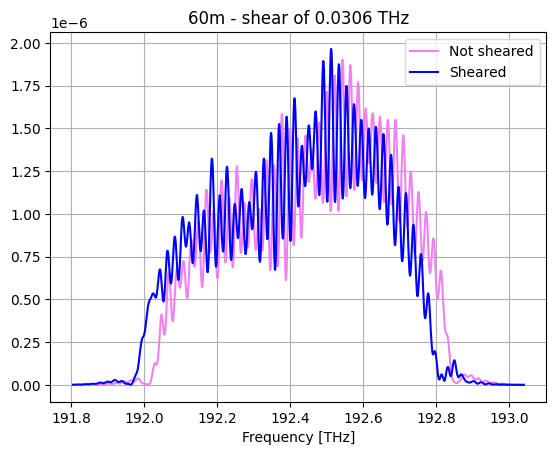

In [45]:
not_sheared40 = sa.load_csv("data/40m_no_shear.csv")
sheared40 = sa.load_csv("data/40m_shear.csv")
not_sheared60 = sa.load_csv("data/60m_no_shear.csv")
sheared60 = sa.load_csv("data/60m_shear.csv")

not_sheared40.wl_to_freq()
sheared40.wl_to_freq()
not_sheared60.wl_to_freq()
sheared60.wl_to_freq()

shear40 = sa.find_shift(not_sheared40, sheared40)
shear60 = sa.find_shift(not_sheared60, sheared60)
sa.compare_plots([not_sheared40, sheared40], 
            legend = ["Not sheared", "Sheared"],
            title = "40m - shear of {} THz".format(round(shear40, 4)))
sa.compare_plots([not_sheared60, sheared60], 
            legend = ["Not sheared", "Sheared"],
            title = "60m - shear of {} THz".format(round(shear60, 4)))

# 40 m, low visibility

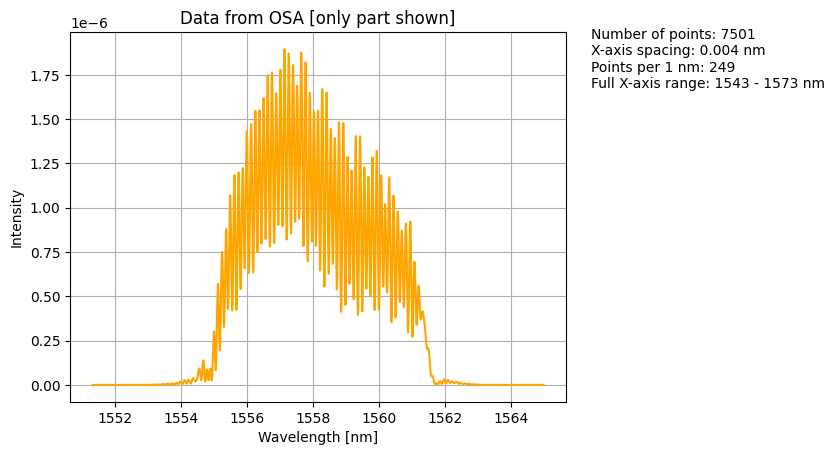

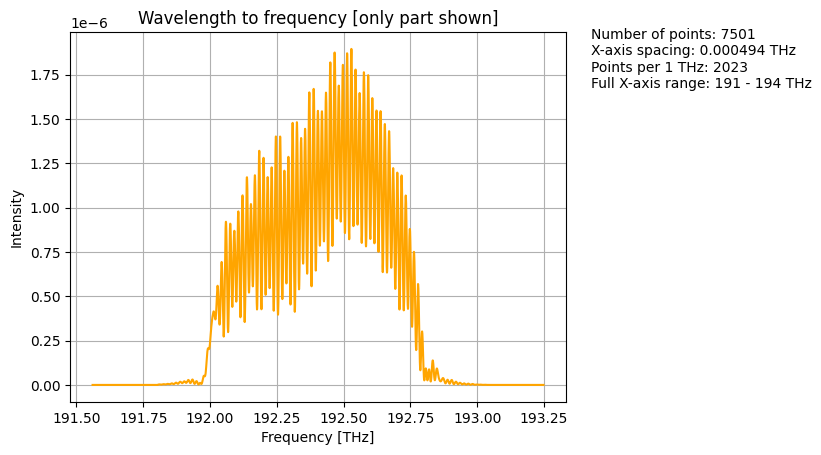

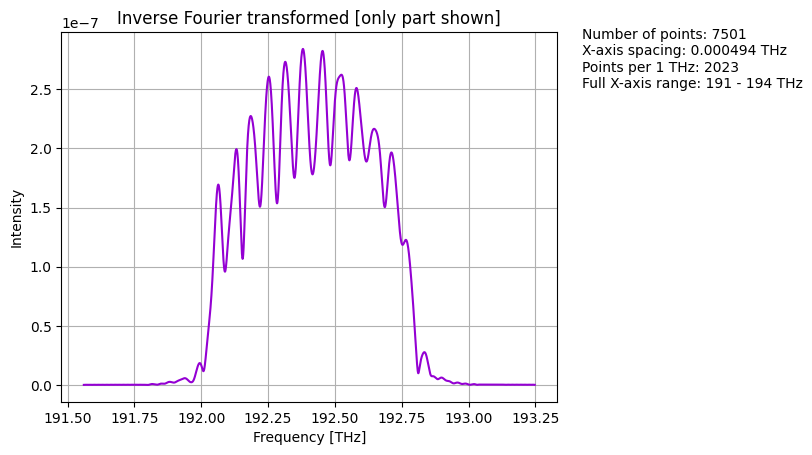

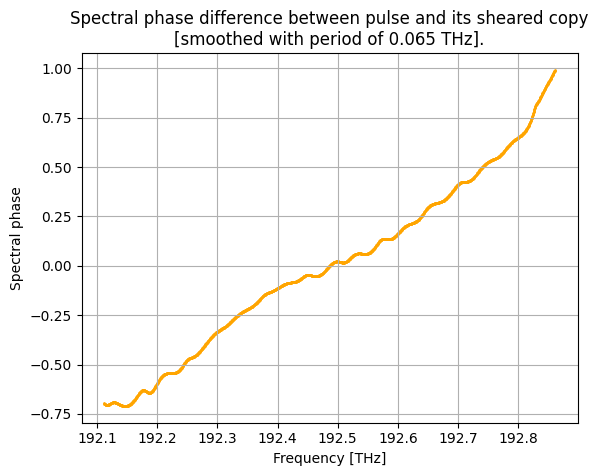

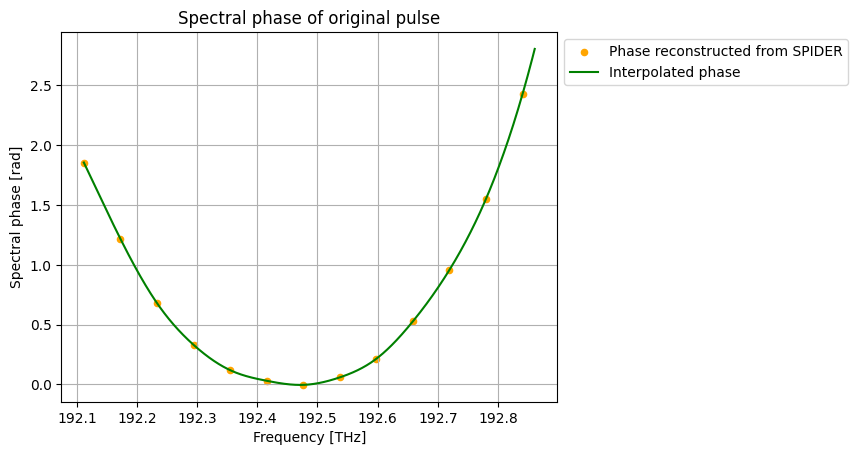

In [46]:
start = 192.05
end = 192.8
pulse = sa.spider(phase_spectrum = "data/40m_p_spectrum_low_vis.csv",
        temporal_spectrum = "data/40m_t_spectrum_low_vis.csv",
        shear = shear40,
        intensity_spectrum = None,
        phase_borders = [start, end],
        what_to_return = "phase",
        vis_param = 0.5,
        smoothing_period = 0.065,
        plot_steps = True,
        plot_shear = True,
        plot_phase = True,
        plot_pulse = False)[1]

pulse.save("40m, low, measured, smoothed.csv")

# 40 m, high visibility

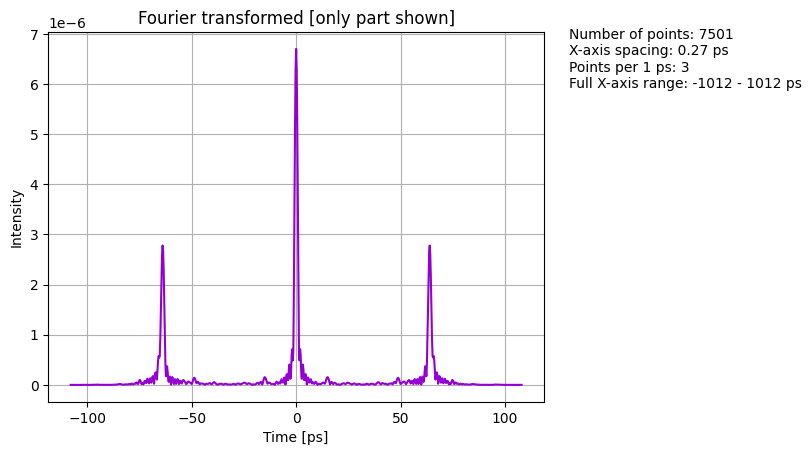

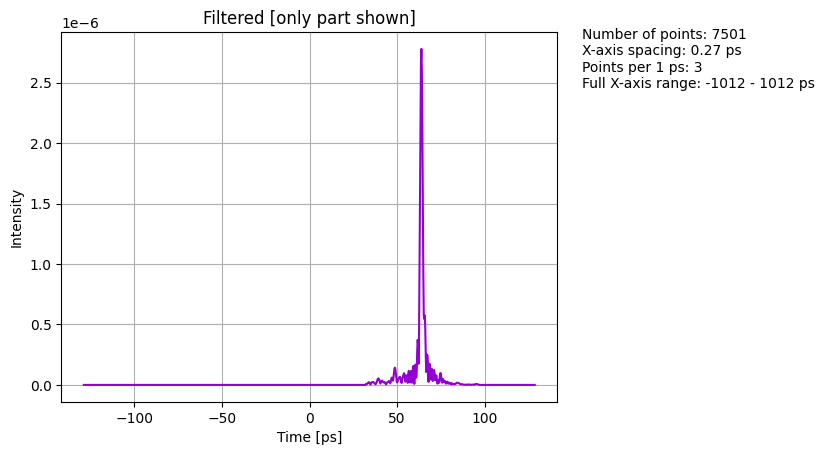

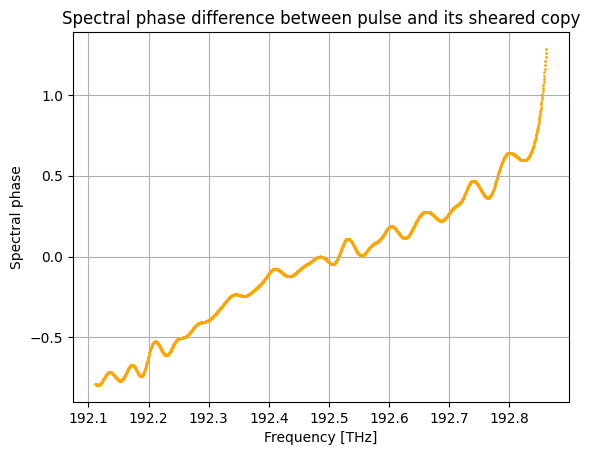

In [47]:
start = 192.05
end = 192.8
pulse = sa.spider(phase_spectrum = "data/40m_p_spectrum_high_vis.csv",
        temporal_spectrum = "data/40m_t_spectrum_high_vis.csv",
        shear = shear40,
        intensity_spectrum = None,
        phase_borders = [start, end],
        what_to_return = "phase",
        vis_param = 0.5,
        smoothing_period = None,
        plot_steps = True,
        plot_shear = True,
        plot_phase = True,
        plot_pulse = False)[1]

pulse.save("40m, high, measured, not smoothed.csv")

# 60 m, low visibility

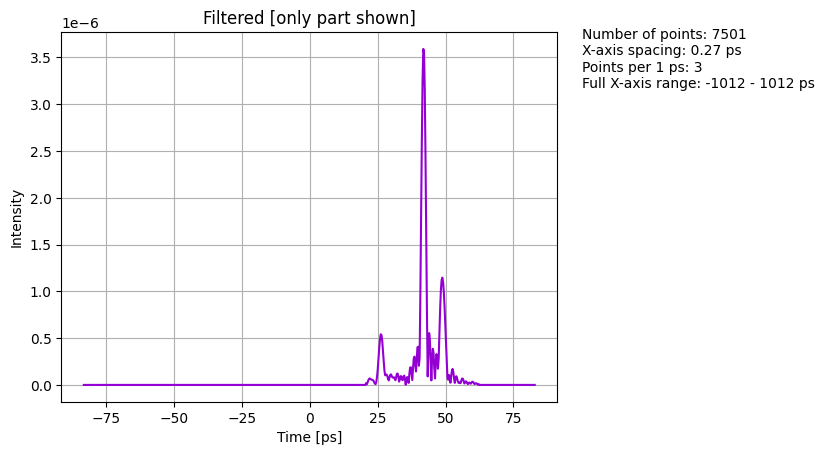

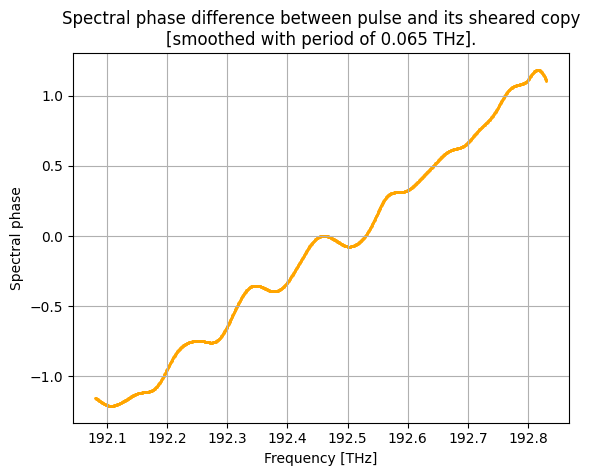

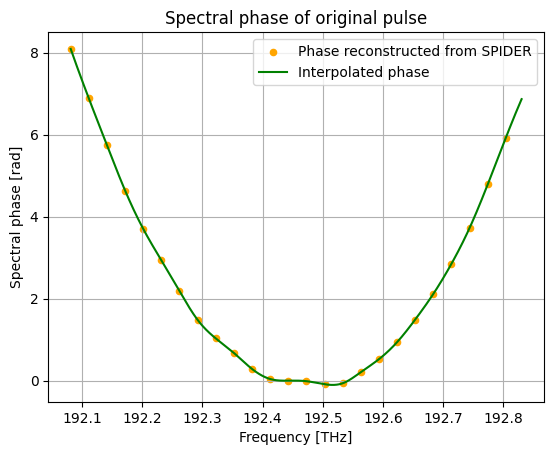

In [48]:
start = 192.05
end = 192.8
pulse = sa.spider(phase_spectrum = "data/60m_p_spectrum_low_vis.csv",
        temporal_spectrum = "data/60m_t_spectrum_low_vis.csv",
        shear = shear60,
        intensity_spectrum = None,
        phase_borders = [start, end],
        what_to_return = "phase",
        vis_param = 0.5,
        smoothing_period = 0.065,
        plot_steps = True,
        plot_shear = True,
        plot_phase = True,
        plot_pulse = False)[1]

pulse.save("60m, low, measured, smoothed.csv")

# 60m, high visibility

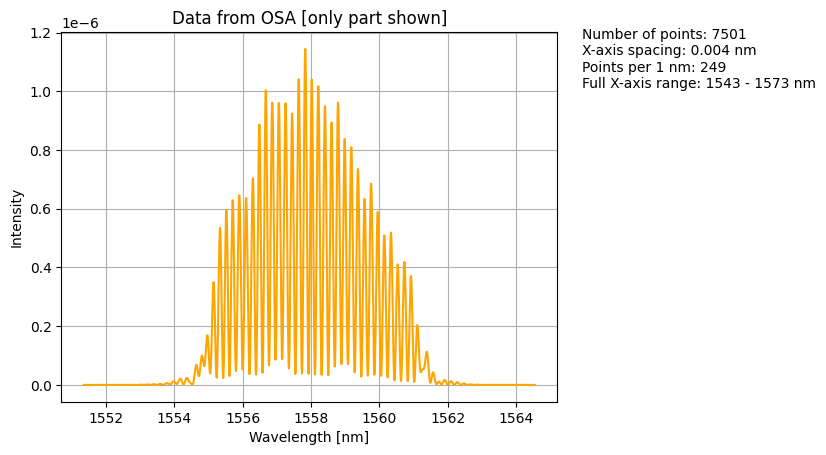

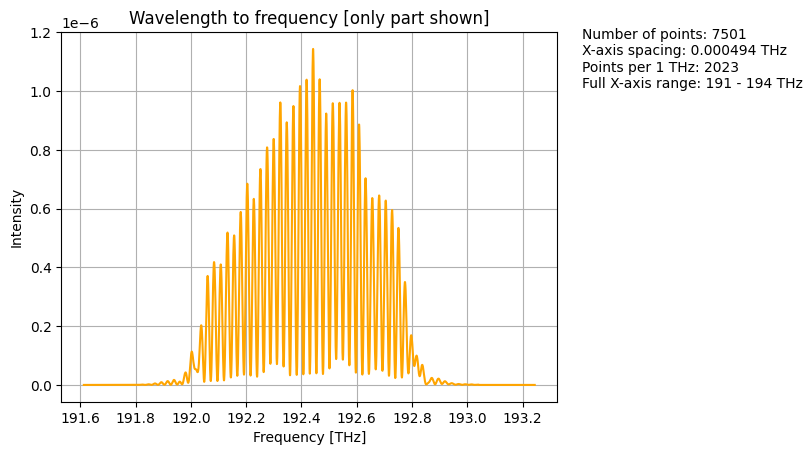

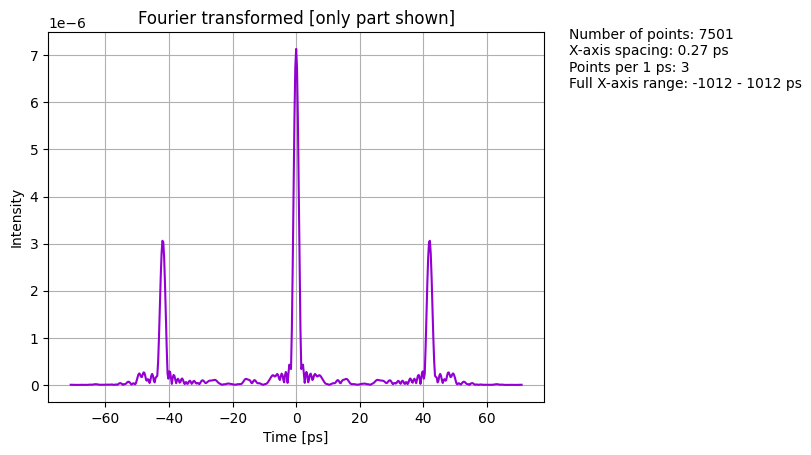

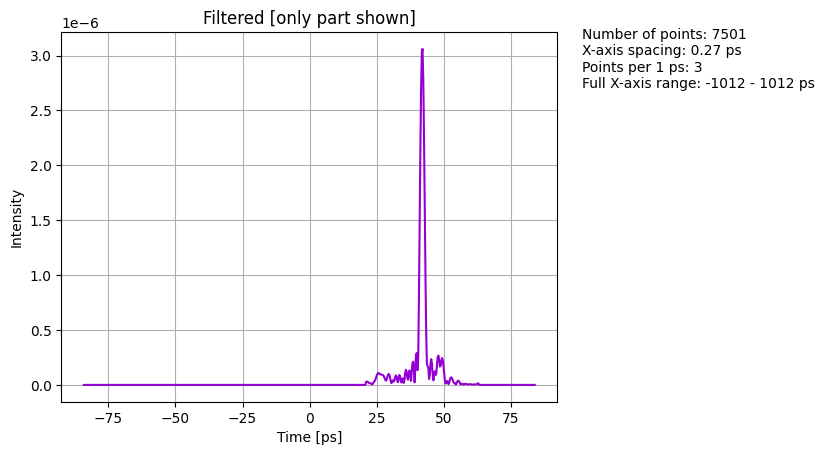

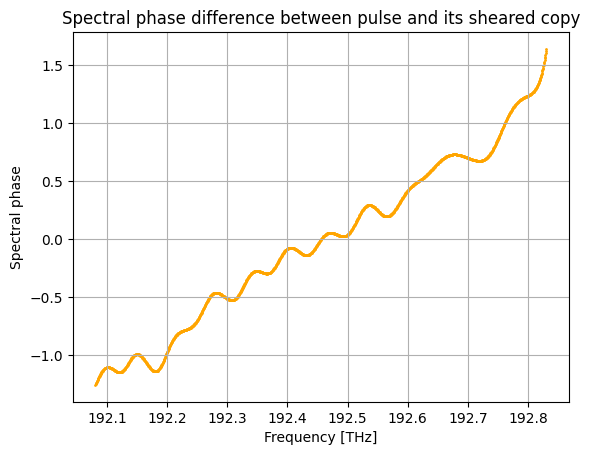

In [49]:
start = 192.05
end = 192.8
pulse = sa.spider(phase_spectrum = "data/60m_p_spectrum_high_vis.csv",
        temporal_spectrum = "data/60m_t_spectrum_high_vis.csv",
        shear = shear60,
        intensity_spectrum = None,
        phase_borders = [start, end],
        what_to_return = "phase",
        vis_param = 0.5,
        smoothing_period = None,
        plot_steps = True,
        plot_shear = True,
        plot_phase = True,
        plot_pulse = False)[1]

pulse.save("60m, high, measured, not smoothed.csv")

# 80m

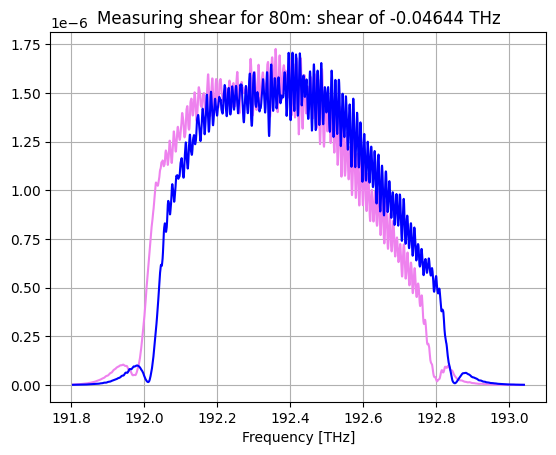

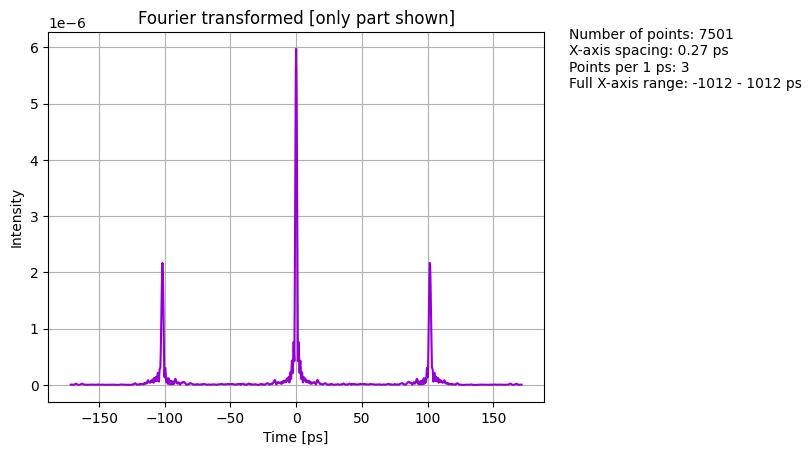

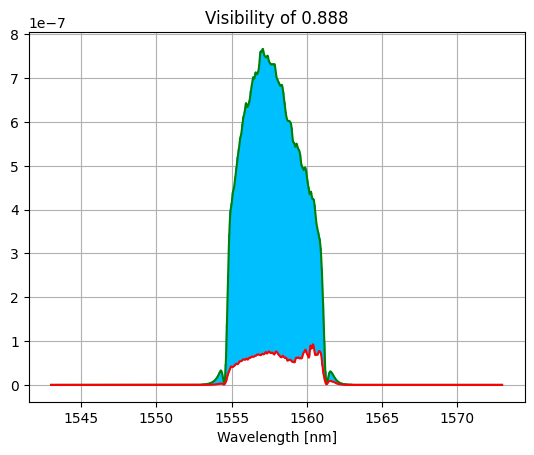

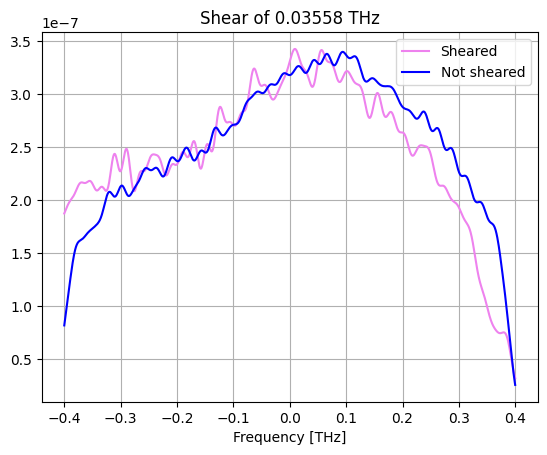

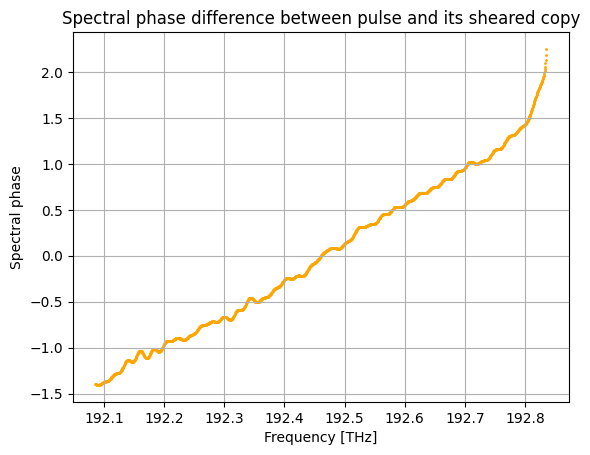

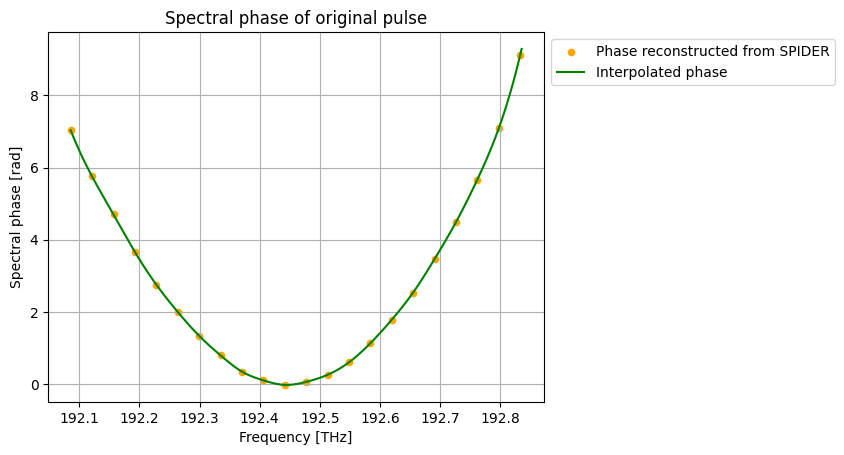

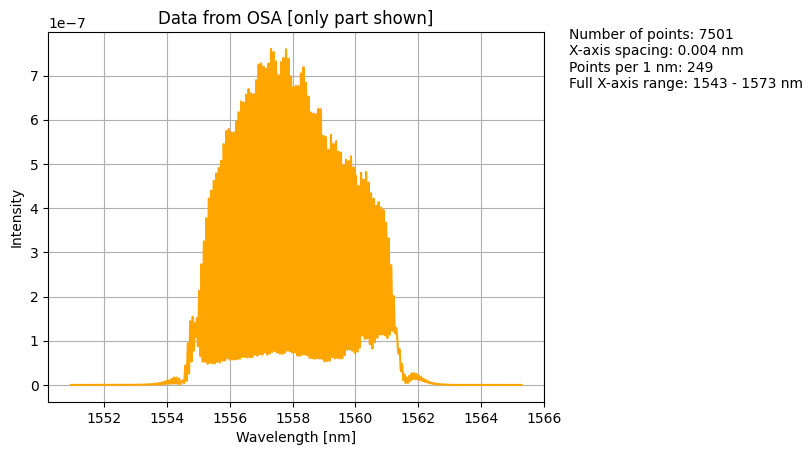

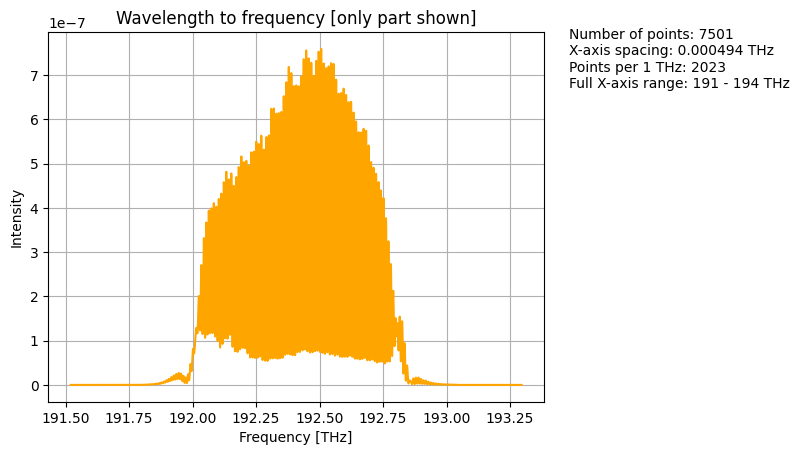

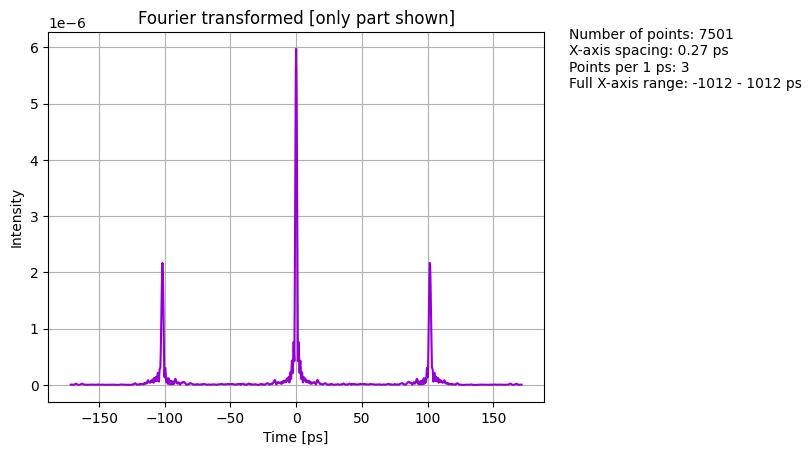

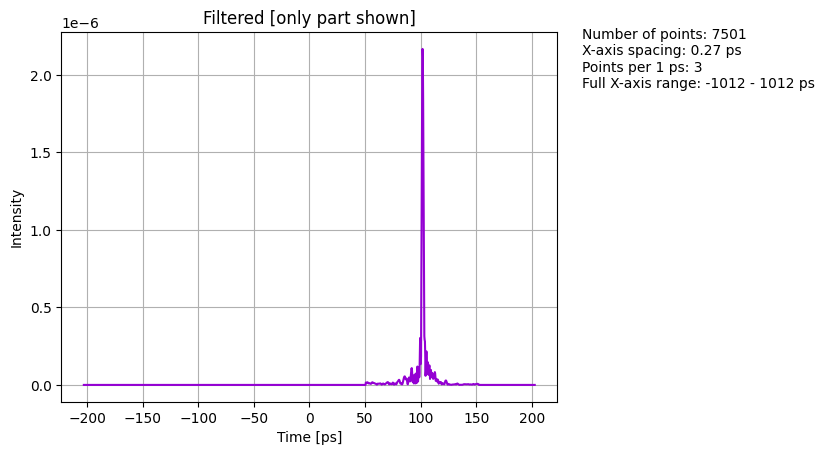

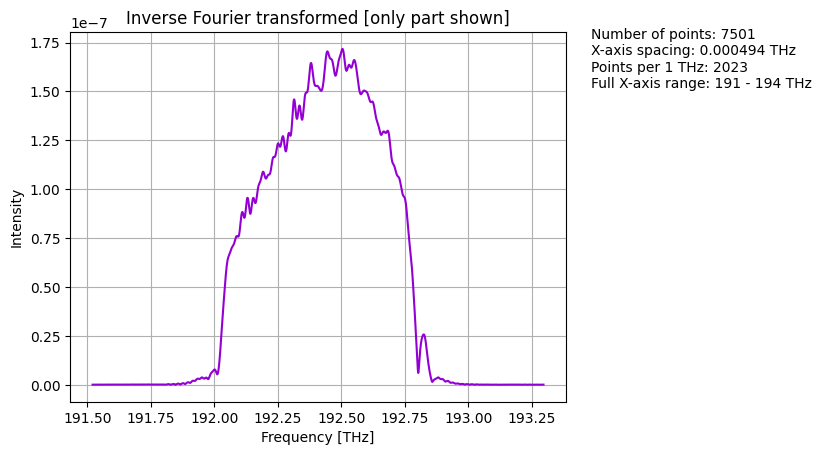

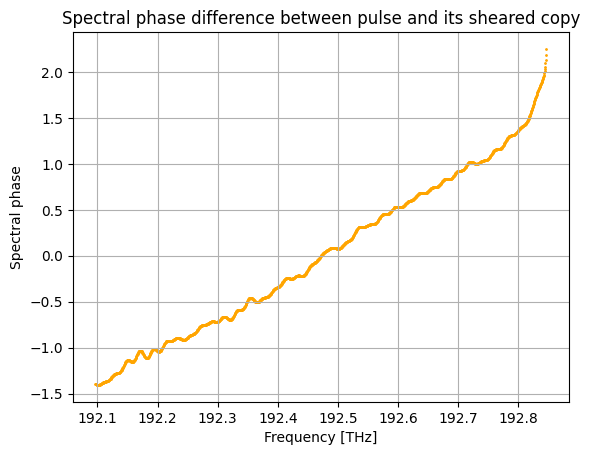

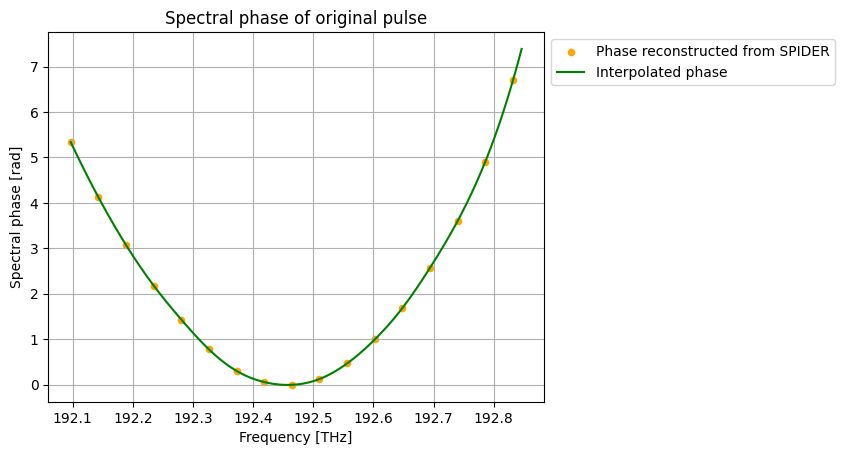

C:\Users\rewas\AppData\Local\Temp\ipykernel_1144\1866623573.py:49: RuntimeWarning: overflow encountered in long_scalars
  return l_0**2*fiber_length*D_l/(4*np.pi*c)*(omega-omega_mean)**2


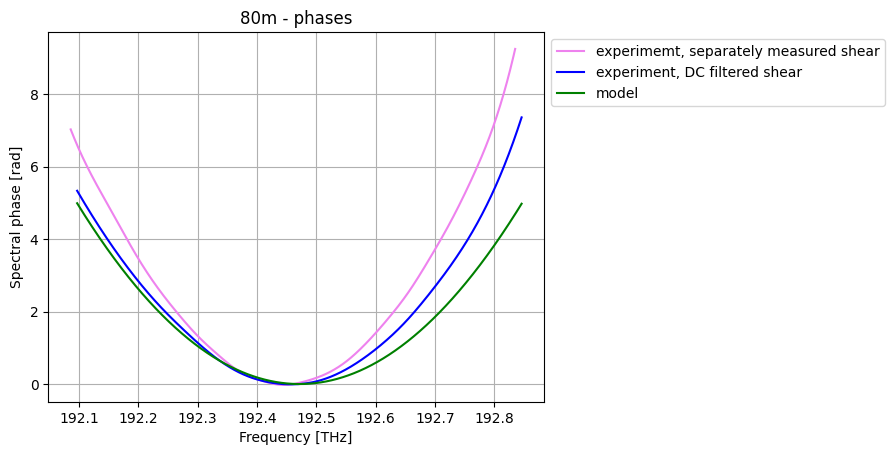

In [50]:
sheared = sa.load_csv("data/80m_shear.csv")
not_sheared = sa.load_csv("data/80m_no_shear.csv")

sheared.wl_to_freq()
not_sheared.wl_to_freq()

shear80 = sa.find_shift(sheared, not_sheared)

sa.compare_plots([sheared, not_sheared], 
        title = "Measuring shear for 80m: shear of {} THz".format(round(shear80,5)))

start = 192.05
end = 192.8

pulse_m = sa.spider(phase_spectrum = "data/80m_p_spectrum.csv",
        temporal_spectrum = "data/80m_t_spectrum.csv",
        shear = None,
        intensity_spectrum = None,
        phase_borders = [start, end],
        what_to_return = "phase",
        vis_param = 0.5,
        smoothing_period = None,
        plot_steps = True,
        plot_shear = True,
        plot_phase = True,
        plot_pulse = False)[1]

pulse_e = sa.spider(phase_spectrum = "data/80m_p_spectrum.csv",
        temporal_spectrum = "data/80m_t_spectrum.csv",
        shear = np.abs(shear80),
        intensity_spectrum = None,
        phase_borders = [start, end],
        what_to_return = "phase",
        vis_param = 0.5,
        smoothing_period = None,
        plot_steps = True,
        plot_shear = True,
        plot_phase = True,
        plot_pulse = False)[1]

X = pulse_e.X

def phase(f, f_mean, fiber_length):
    l_0 = 1560
    c = 3*1e8
    D_l = 17
    omega = f*2*np.pi
    omega_mean = f_mean*2*np.pi
    return l_0**2*fiber_length*D_l/(4*np.pi*c)*(omega-omega_mean)**2

phase = np.vectorize(phase)

Y = phase(X, np.mean(X), 82)

pulse_s = sa.spectrum(X, Y, "freq", "phase")

sa.compare_plots([pulse_m, pulse_e, pulse_s],
    title = "80m - phases",
    legend = ["experimemt, separately measured shear",
    "experiment, DC filtered shear",
    "model"])

# 60 m v2

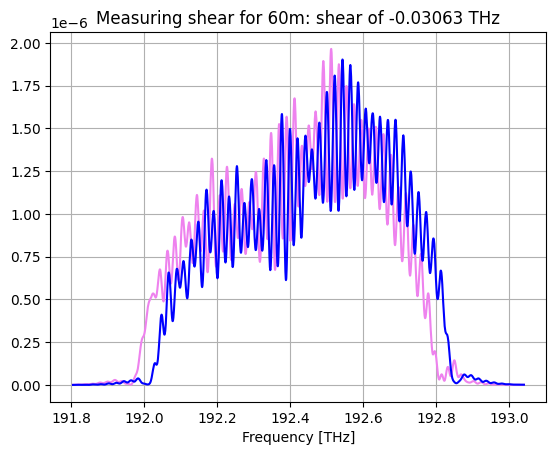

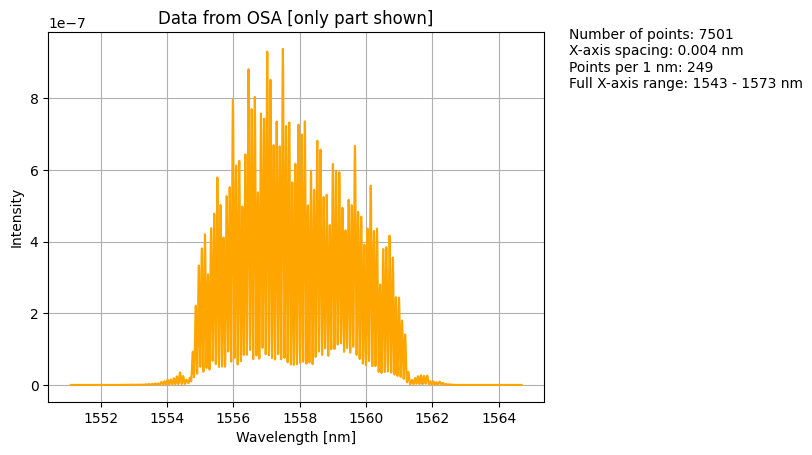

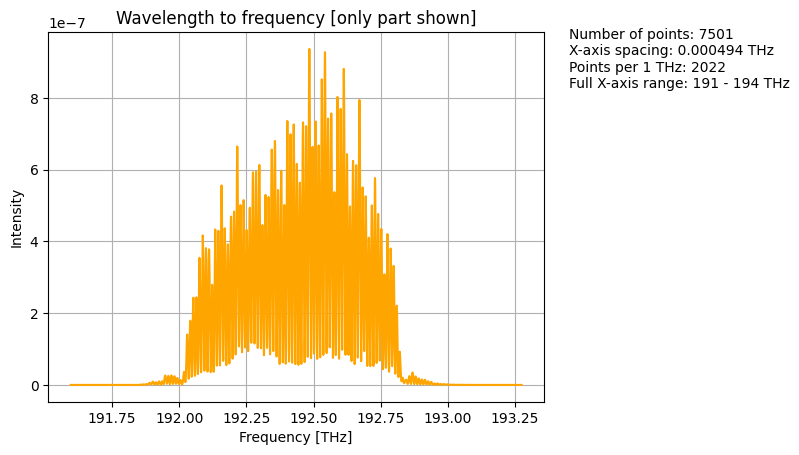

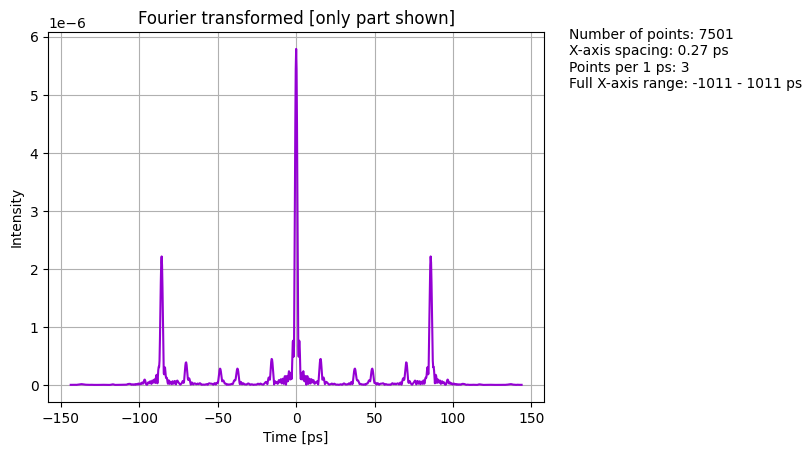

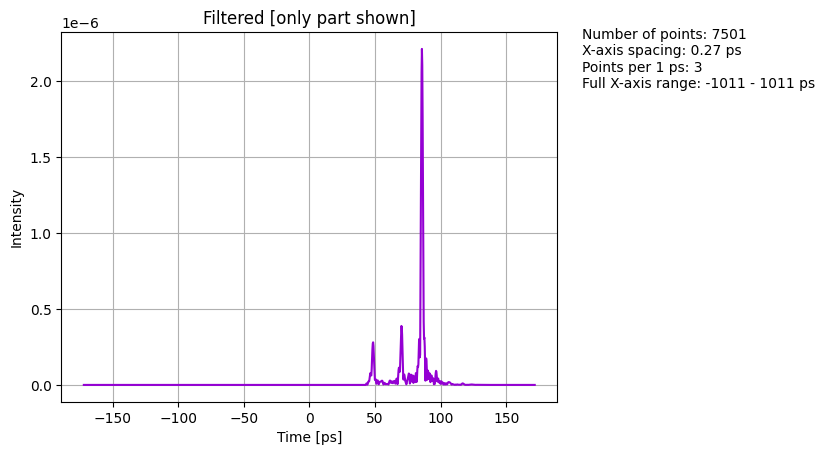

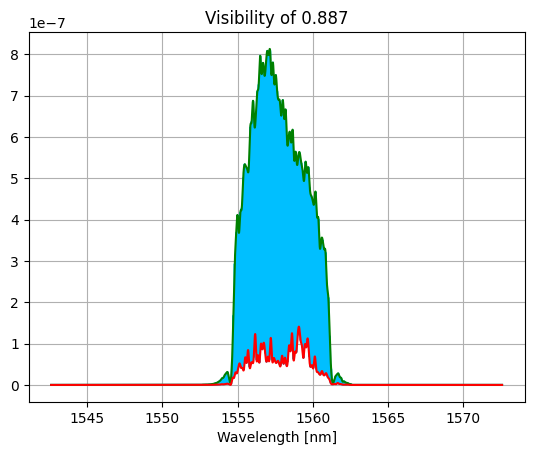

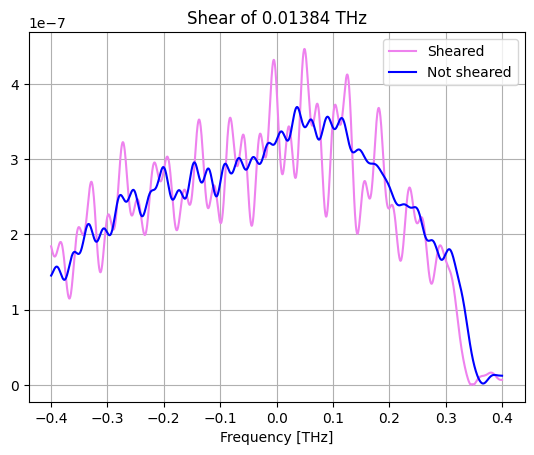

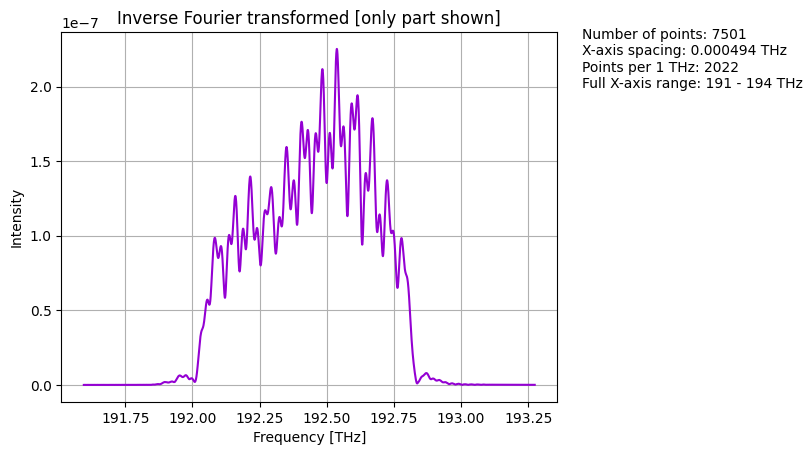

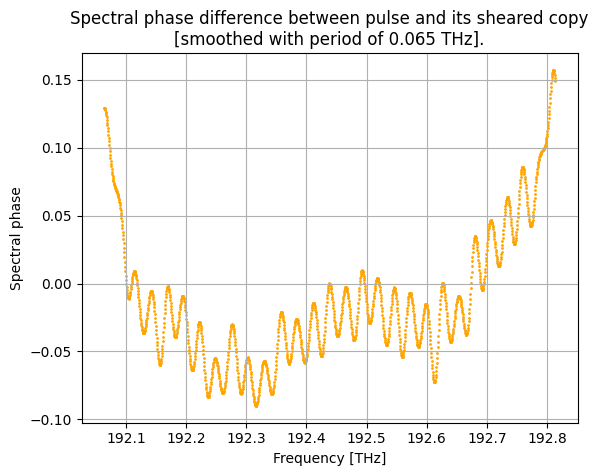

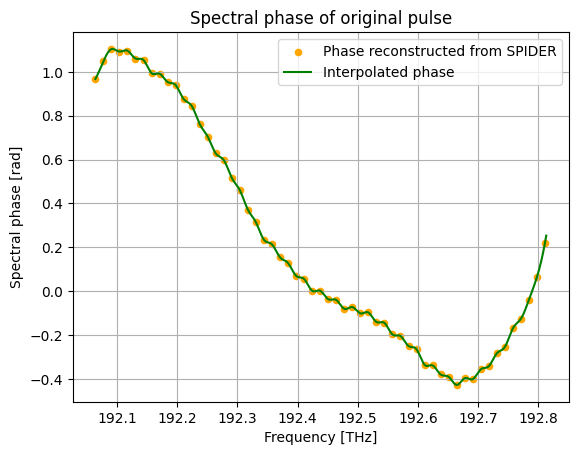

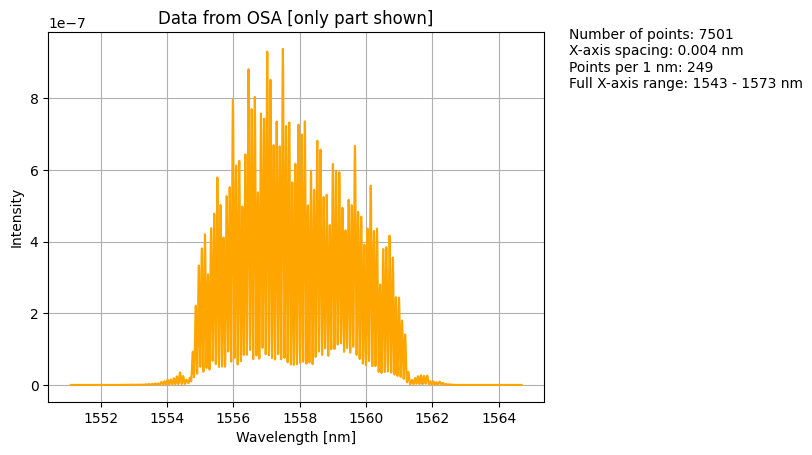

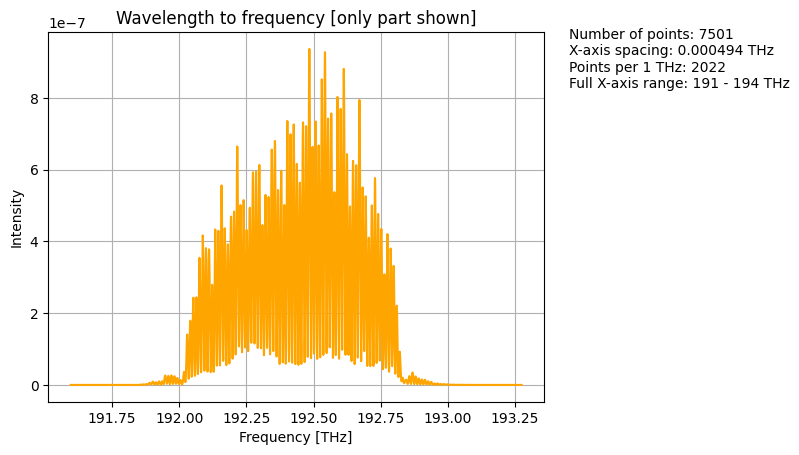

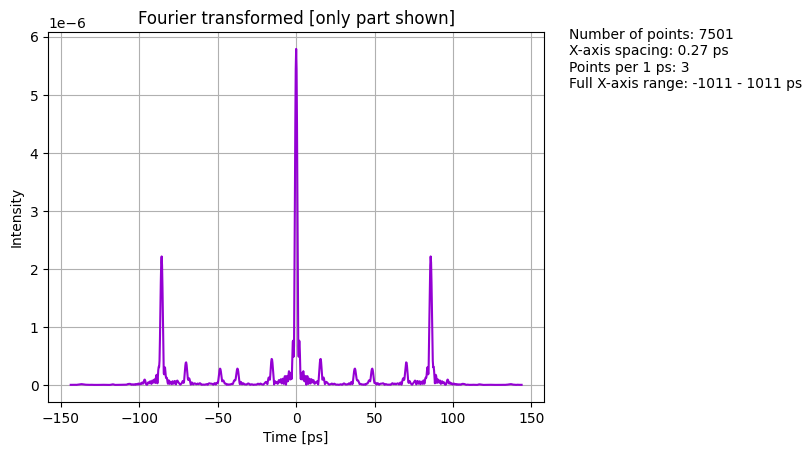

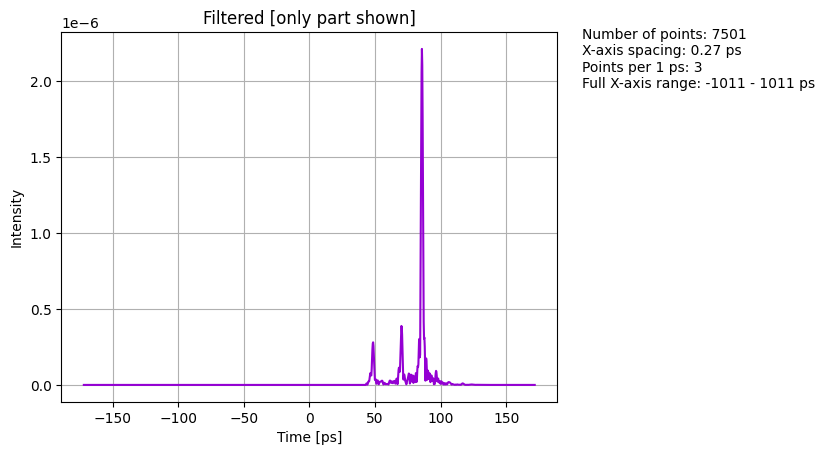

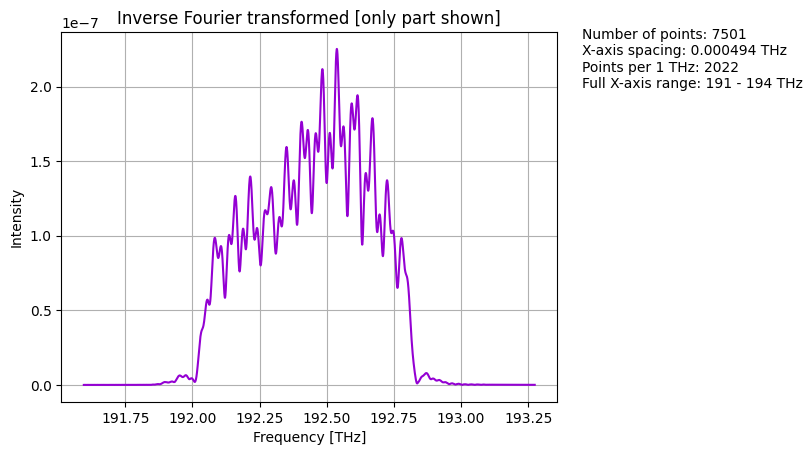

C:\Users\rewas\AppData\Local\Temp\ipykernel_1144\87243572.py:49: RuntimeWarning: overflow encountered in long_scalars
  return l_0**2*fiber_length*D_l/(4*np.pi*c)*(omega-omega_mean)**2


In [51]:
sheared = sa.load_csv("data/60m_shear.csv")
not_sheared = sa.load_csv("data/60m_no_shear.csv")

sheared.wl_to_freq()
not_sheared.wl_to_freq()

shear60 = sa.find_shift(sheared, not_sheared)

sa.compare_plots([sheared, not_sheared], 
        title = "Measuring shear for 60m: shear of {} THz".format(round(shear60,5)))

start = 192.05
end = 192.8

pulse_m = sa.spider(phase_spectrum = "data/60m_p_spectrum_2.csv",
        temporal_spectrum = "data/60m_t_spectrum_2.csv",
        shear = None,
        intensity_spectrum = None,
        phase_borders = [start, end],
        what_to_return = "phase",
        vis_param = 0.5,
        smoothing_period = 0.065,
        plot_steps = True,
        plot_shear = True,
        plot_phase = True,
        plot_pulse = False)[1]

pulse_e = sa.spider(phase_spectrum = "data/60m_p_spectrum_2.csv",
        temporal_spectrum = "data/60m_t_spectrum_2.csv",
        shear = np.abs(shear80),
        intensity_spectrum = None,
        phase_borders = [start, end],
        what_to_return = "phase",
        vis_param = 0.5,
        smoothing_period = 0.065,
        plot_steps = True,
        plot_shear = True,
        plot_phase = True,
        plot_pulse = False)[1]

X = pulse_e.X

def phase(f, f_mean, fiber_length):
    l_0 = 1560
    c = 3*1e8
    D_l = 17
    omega = f*2*np.pi
    omega_mean = f_mean*2*np.pi
    return l_0**2*fiber_length*D_l/(4*np.pi*c)*(omega-omega_mean)**2

phase = np.vectorize(phase)

Y = phase(X, np.mean(X), 62)

pulse_s = sa.spectrum(X, Y, "freq", "phase")

sa.compare_plots([pulse_m, pulse_e, pulse_s],
    title = "60m - phases",
    legend = ["experimemt, separately measured shear",
    "experiment, DC filtered shear",
    "model"])

# 60 v3

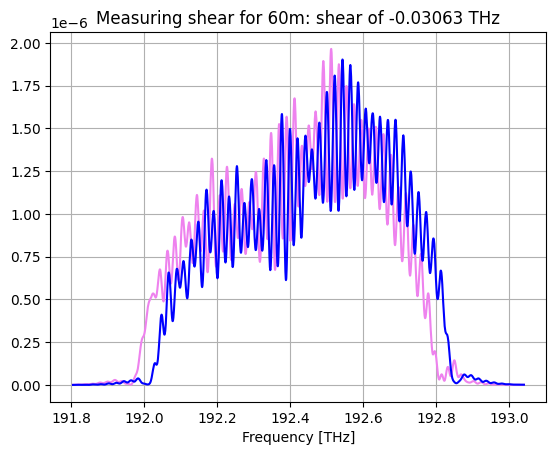

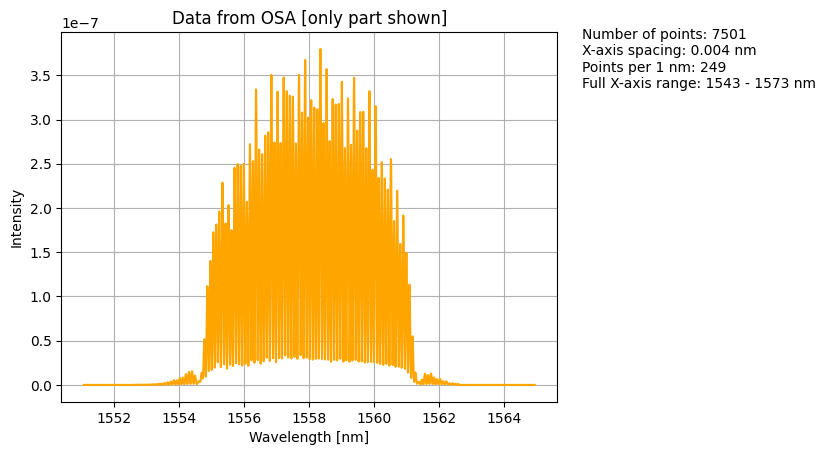

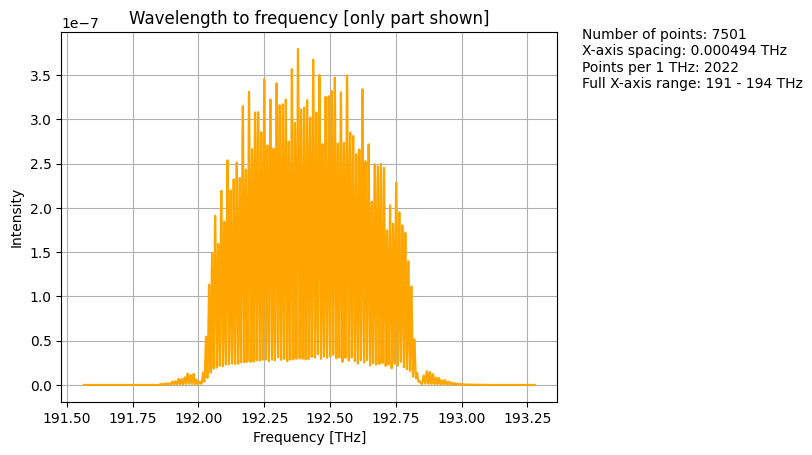

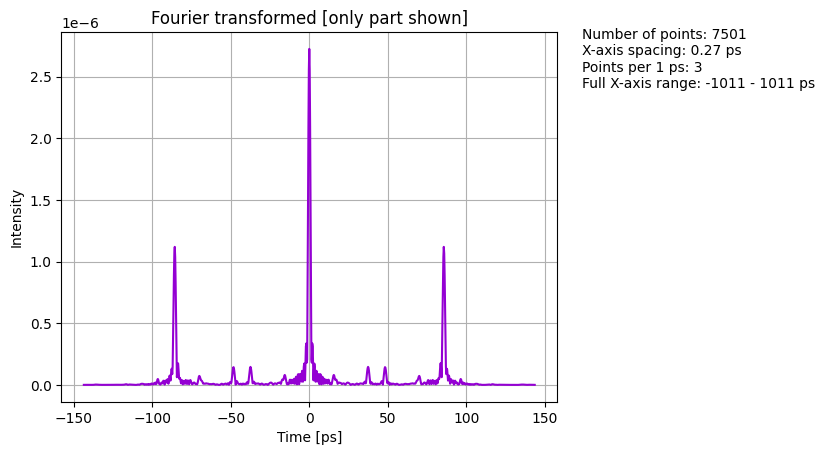

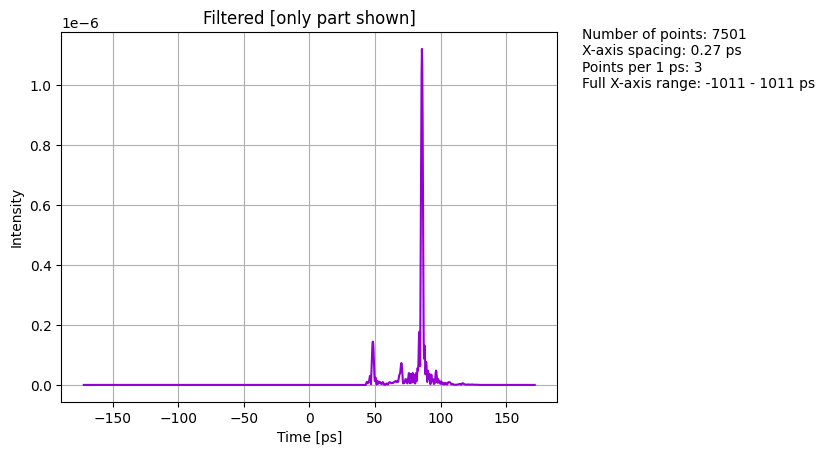

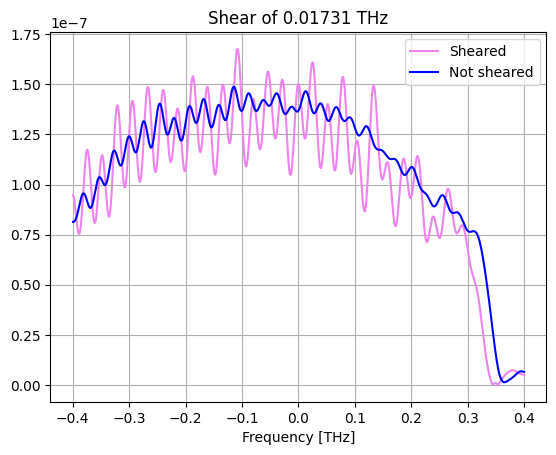

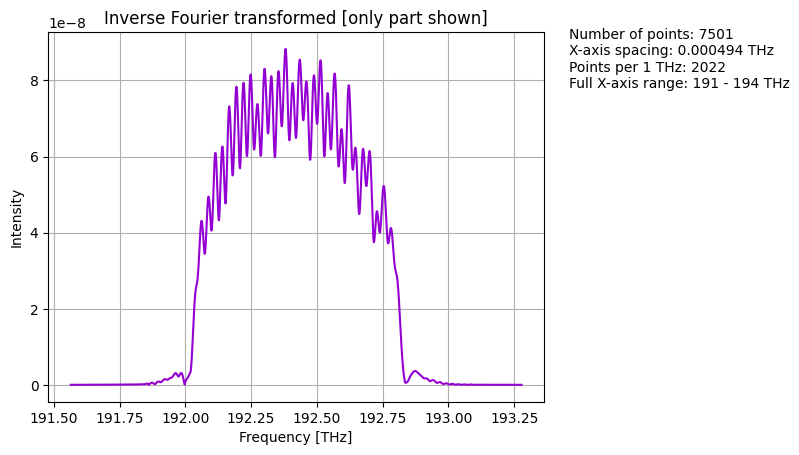

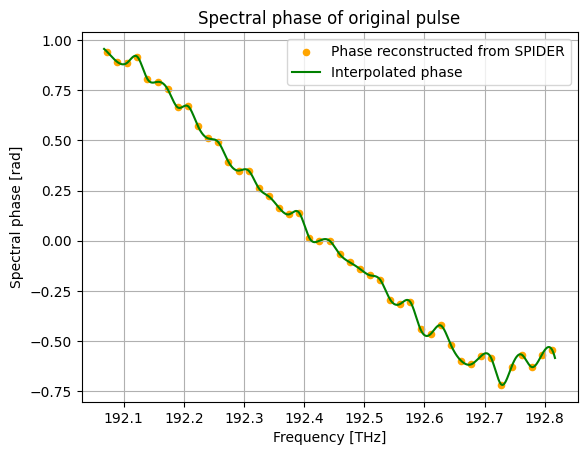

C:\Users\rewas\AppData\Local\Temp\ipykernel_3092\815810422.py:37: RuntimeWarning: overflow encountered in long_scalars
  return l_0**2*fiber_length*D_l/(4*np.pi*c)*(omega-omega_mean)**2


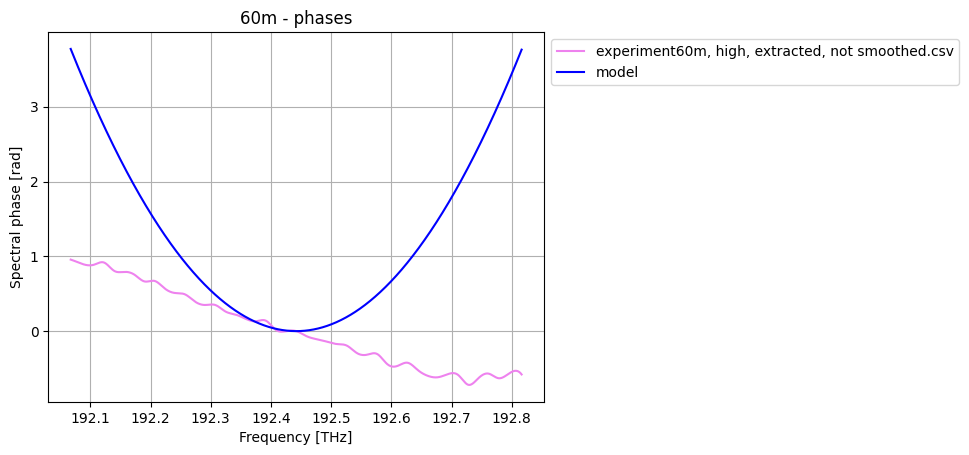

In [7]:
sheared = sa.load_csv("data/60m_shear.csv")
not_sheared = sa.load_csv("data/60m_no_shear.csv")

sheared.wl_to_freq()
not_sheared.wl_to_freq()

shear60 = sa.find_shift(sheared, not_sheared)

sa.compare_plots([sheared, not_sheared], 
        title = "Measuring shear for 60m: shear of {} THz".format(round(shear60,5)))

start = 192.05
end = 192.8

sa.plot(sa.load_csv("data/60m_t_spectrum_v3.csv"), title = "Spectrum with EOPM off")

pulse_m = sa.spider(phase_spectrum = "data/60m_p_spectrum_v3.csv",
        temporal_spectrum = "data/60m_t_spectrum_v3.csv",
        shear = None,
        intensity_spectrum = None,
        phase_borders = [start, end],
        what_to_return = "phase",
        smoothing_period = 0.02,
        plot_steps = True,
        plot_shear = True,
        plot_phase = True,
        plot_pulse = False)[1]

X = pulse_m.X

def phase(f, f_mean, fiber_length):
    l_0 = 1560
    c = 3*1e8
    D_l = 17
    omega = f*2*np.pi
    omega_mean = f_mean*2*np.pi
    return l_0**2*fiber_length*D_l/(4*np.pi*c)*(omega-omega_mean)**2

phase = np.vectorize(phase)

Y = phase(X, np.mean(X), 62)

pulse_s = sa.spectrum(X, Y, "freq", "phase")

sa.compare_plots([pulse_m, pulse_s],
    title = "60m - phases",
    legend = ["experiment""60m, high, extracted, not smoothed.csv",
    "model"])